<a href="https://colab.research.google.com/github/pragneshrana/Algo_Trial/blob/master/ANOVA_INTERPRETATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as ols
from sklearn import datasets ## imports datasets from scikit-learn
from statsmodels.stats.anova import anova_lm #ANOVA
data = datasets.load_boston() ## loads Boston dataset from datasets library 
 
###Scikit type to pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])
type(df)
print(df.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


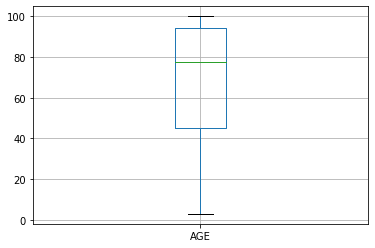

In [3]:
#Plotting box plots
df.boxplot('AGE')


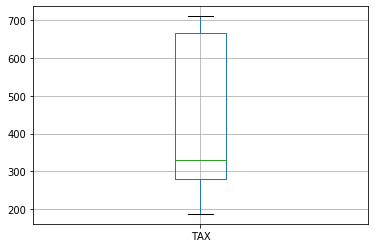

In [4]:
df.boxplot('TAX')

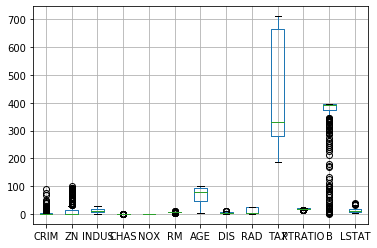

In [5]:
#All parameter box plot
df.boxplot()

In [25]:
## Without a constant

import statsmodels.api as sm

X = df["CRIM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

error  = np.sum(np.square(np.abs(predictions - y)))
print(error)
# Print out the statistics
model.summary()

284620.15079262323


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.050
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              26.63
Date:                Mon, 20 Jan 2020   Prob (F-statistic):                    3.56e-07
Time:                        18:15:27   Log-Likelihood:                         -2320.1
No. Observations:                 506   AIC:                                      4642.
Df Residuals:                     505   BIC:                                      4646.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.5842      0.113      5.160      0.000       0.362       0.807
==============================================================================
Omnibus:                       67.016   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.479
Skew:                          -0.544   Prob(JB):                     2.47e-55
Kurtosis:                       6.278   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
## With a constant Multiple

import statsmodels.api as sm

##Adding constant 
print(list(df.columns))
ones = np.ones(len(df))

column_name =list(df.columns)
# column_name.remove('RAD')
X = df[column_name]
X['const'] = ones
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):          6.72e-135
Time:                        14:31:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
const         36.4595      5.103      7.144      0.000      26.432      46.487
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation : <br>
By minimizinng sum of square, best regression line is obtained. <br>
other if you change $Xi$ by one unit then dependent unit will get affected by $\beta_i$.  \beta_i$ also indicates the aveage expected change in the interval. Which also helps in interpretation of the confidence interval.<br>



Meaning of Intercept:<br>
Intercept is expected value of Y when all X=0. \
The model indicates 



In [23]:
# Peform analysis of variance on fitted linear model

dependent  = ''
for i in range(df.shape[1]):
  if(df.columns[i] == 'RAD'):
    continue
  dependent += '+' + str(df.columns[i])

dependent = dependent[1:] #removing first char

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM 
final_data = X
final_data["MEDV"] = y
# # Fit the model
model = ols("MEDV ~ "+str(dependent)+"",final_data).fit()
anova_results= anova_lm(model,type=2)

print('\nANOVA results')
print(anova_results)



ANOVA results
             df        sum_sq       mean_sq           F        PR(>F)
CRIM        1.0   6440.783059   6440.783059  274.729447  2.289982e-49
ZN          1.0   3554.336197   3554.336197  151.609021  1.452053e-30
INDUS       1.0   2551.236435   2551.236435  108.822137  3.720903e-23
CHAS        1.0   1529.847881   1529.847881   65.255150  5.099262e-15
NOX         1.0     76.247648     76.247648    3.252318  7.193292e-02
RM          1.0  10938.116611  10938.116611  466.561705  2.610658e-73
AGE         1.0     90.267911     90.267911    3.850348  5.029777e-02
DIS         1.0   1779.501111   1779.501111   75.904025  4.537437e-17
TAX         1.0    228.091098    228.091098    9.729149  1.919837e-03
PTRATIO     1.0   1110.489316   1110.489316   47.367550  1.795008e-11
B           1.0    521.655438    521.655438   22.251038  3.119634e-06
LSTAT       1.0   2337.784206   2337.784206   99.717403  1.651630e-21
Residual  493.0  11557.938504     23.444094         NaN           NaN


Analysis of variance (ANOVA):<br>
It analyse the varaince and tells any of the variable is significant or not. \

sum_sq  = $SS_{parameter}$ = which shows variance covered by each variable. \

$SS_{Residual}$ = Unexplained Residual by the model 

Total $SS_{Total} = 42716.26$ \
Total $SS_{parameter} = 31637.4755$


$R^2$ = 0.7406



F Statistics: <br>
**(RSS - Statistics) or deviance**
F stastics is simply based on the deviacnes between the two models as fraction of the eviacne of the full model, whilst taking account of the number of parameters.

$F_{df_p,df_{p+q}} = \frac{RSS_p - RSS_{p+q}}{(df_p - df_p+q)-(RSS_{p+q}/df_{p+q})}$

where,

p model is for $y=\alpha$ <br>
q model is for $y=\alpha + \beta X $ <br>



$R^2 : $

$R^2 = \frac{\text{RSS after regression }}{\text{total RSS}}  = \frac{\text{Change of deviance }}{\text{RSS obtained by NULL model}}  $

It indiactes the percetage of variations in the responce variable that is explained by the model.

Total RSS is obtained by the $y = \alpha $ model which gives the predictor $\bar{y} = $ average values of Y or mean line or (expected value of given Y) <bR>



Adjusted $R^2$:

$R^2_{adj} = R^2 - \frac{k(1-R^2)}{n-k-1}$




Multiple Regression:<br>

let's take model $Y = \alpha + \beta_1 X_1 + \beta_1 X_2 +\beta_1 X_3 $<br>

1. $\alpha $ indicates change in value of Y obtained when All X's are zero.<br>
2. each $\beta$ parameter indicates the average change in Y that is asssociated with unit change in X while controlling the other explanatory variables.<br>
Besically effetc of each X's obtianed by comparing $X_i$ with it's nested model.

Ex: **Effect of $X_3$** can be obtained by comparing,<br>
 $Y = \alpha + \beta_1 X_1 + \beta_1 X_2 +\beta_1 X_3 $<br>
 and 
<br>
 $Y = \alpha + \beta_1 X_1 + \beta_1 X_2 $
 It shows unique effect of $X_3$ obtained by comparing RSS or (deviance) when effect of $X_1$ and $X_2$ are accounted in the model.

 The **combined effect** of all the three parameters are obtaiend by comparing FULL model and NULL model.

 $Y = \alpha + \beta_1 X_1 + \beta_1 X_2 +\beta_1 X_3 $<br>
 and 
<br>
 $Y = \alpha$

 The significance of change can be assesed by calculations of F Stastics.




